# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Upload Dataset**

In [ ]:
df = pd.read_csv('/content/Medical cost dataset.csv')

# **Visualize the Dataset**

In [ ]:
df.sample(9)

,age,sex,bmi,children,smoker,region,charges
833,58,male,34.390,0,no,northwest,11743.93410
301,53,female,22.610,3,yes,northeast,24873.38490
668,62,male,32.015,0,yes,northeast,45710.20785
932,46,male,25.800,5,no,southwest,10096.97000
871,26,female,29.480,1,no,southeast,3392.36520
299,48,female,28.880,1,no,northwest,9249.49520
330,61,female,36.385,1,yes,northeast,48517.56315
1229,58,male,30.305,0,no,northeast,11938.25595
946,42,male,35.800,2,no,southwest,7160.09400


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Explore the Dataset**

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
df = df.dropna()

Here we have 6 featres and 1 label. In 6 features 3 of them are categorical. Sex and smoker have only two categories which we can use **label encoding** to convert them to numerical value. For region we have more than 2 categories in this case we need to use one **hot encoding** to convert them to numerical values

In [ ]:
#label encoding for binary values (Sex and Smoker)
df['sex'] = df['sex'].map({'female':0,'male':1})
df['smoker'] = df['smoker'].map({'no':0,'yes':1})
print(df.dtypes)

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object


In [ ]:
#hot encoding for more than two categories (Regions)
df = pd.get_dummies(df,columns=['region'],drop_first=True)

In [ ]:
# Now we are solving multiple linear regression so we will be taking 2 or more features so lets see the correlation of each features
df.corr()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


In [ ]:
import seaborn as sns
# Select relevant columns
cols = ['age', 'sex', 'bmi', 'children', 'smoker', 'charges']
df_selected = df[cols]


In [ ]:
corr = df_selected.corr()
print(corr)

               age       sex       bmi  children    smoker   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000  0.787251
charges   0.299008  0.057292  0.198341  0.067998  0.787251  1.000000


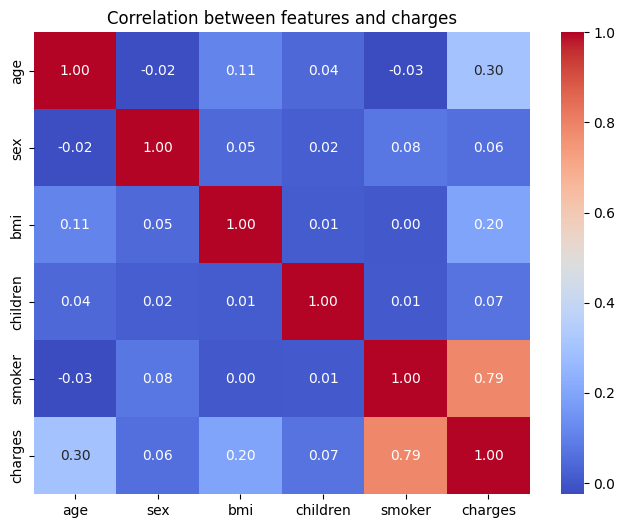

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between features and charges")
plt.show()

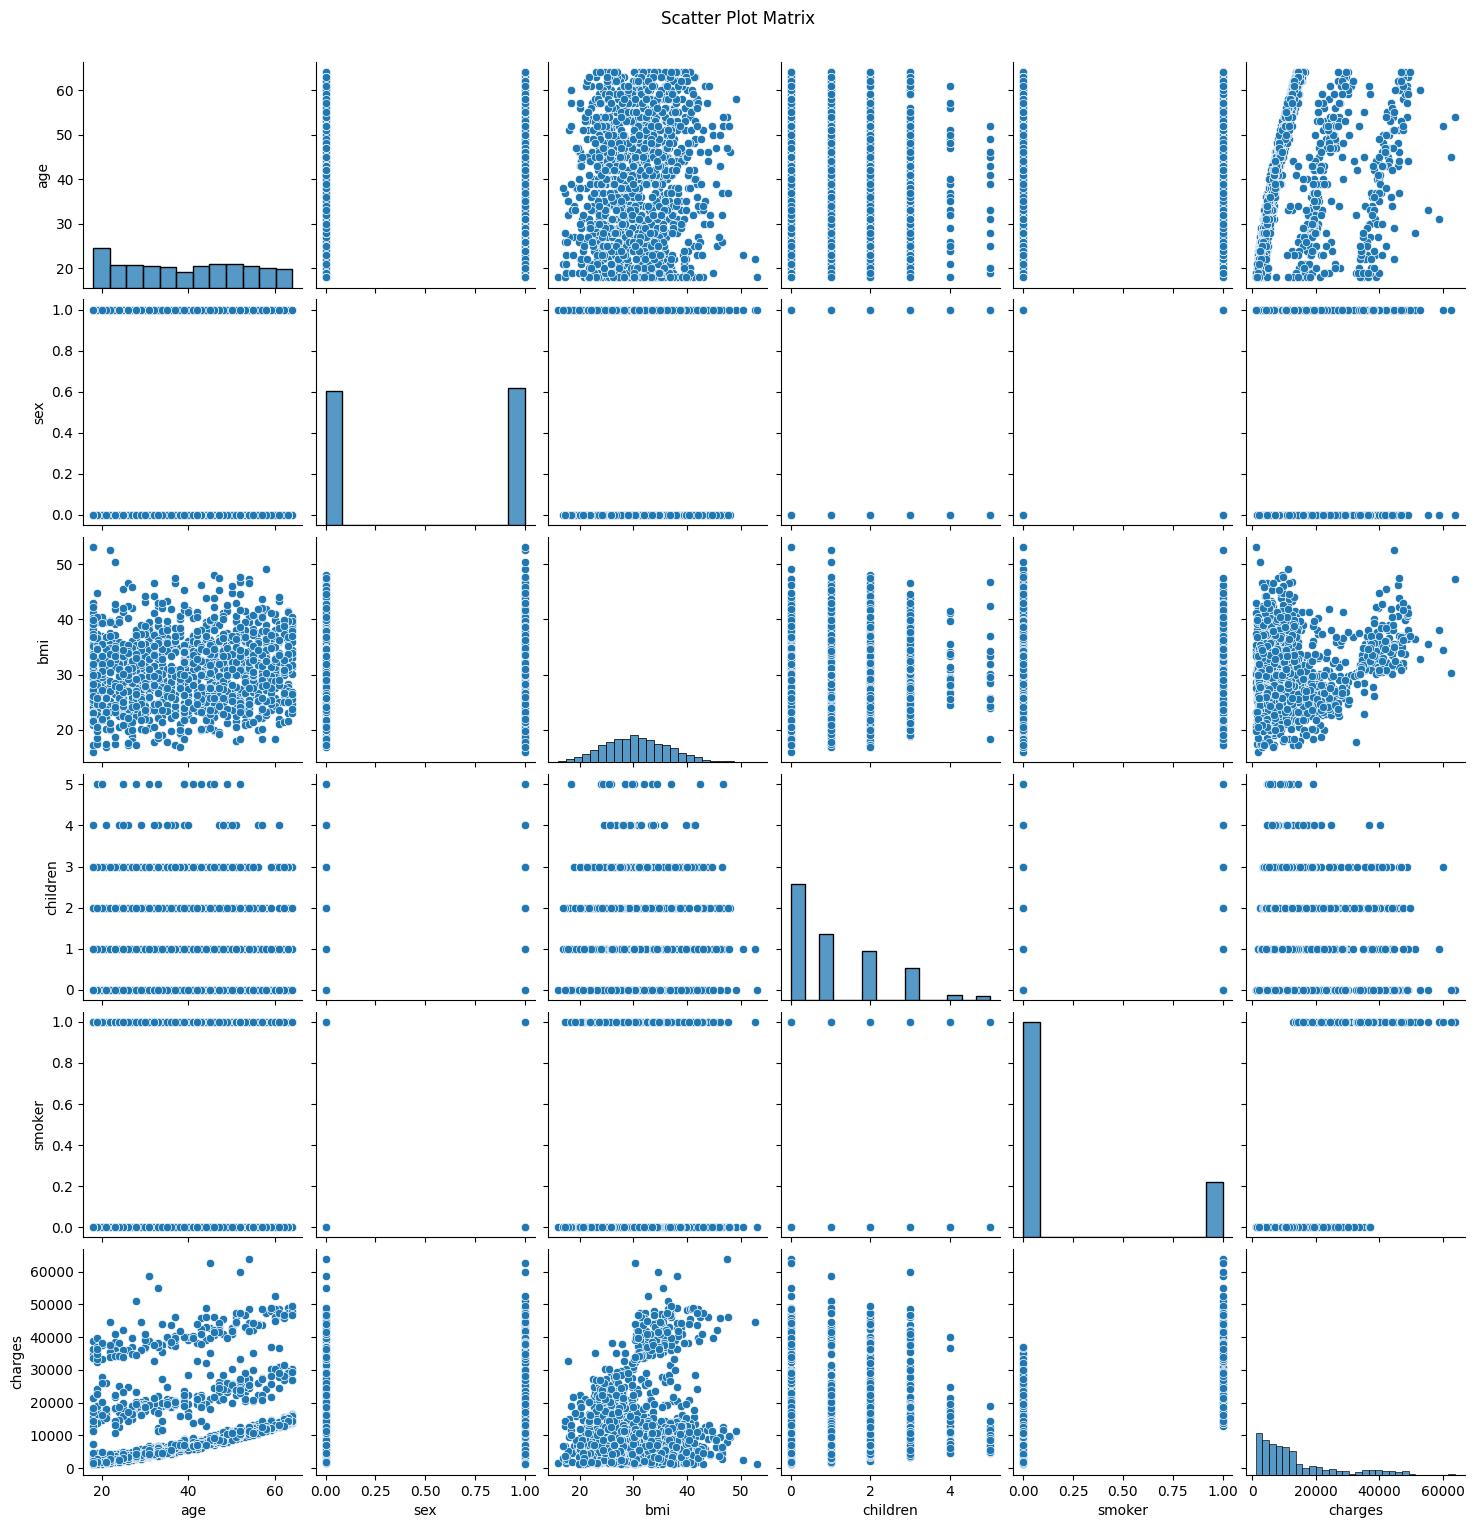

In [ ]:
sns.pairplot(df_selected, kind='scatter', diag_kind='hist')
plt.suptitle("Scatter Plot Matrix", y=1.02)  # title above the plots
plt.show()


# **Extracting Features**

In [ ]:
X = df[['age', 'bmi']].to_numpy()
y = df['charges'].to_numpy()

# **Standardization**

It is common in regression problem. Since we are considering 3 features for this problem we need to standardize them to have mean = 0 and Standard deviation = 1. So that all values will be in same scale and the result will not be affected since it is sensitive to magnitude

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])

[[-1.43876426 -0.45332   ]
 [-1.50996545  0.5096211 ]
 [-0.79795355  0.38330685]
 [-0.4419476  -1.30553108]
 [-0.51314879 -0.29255641]]


In [ ]:
pd.DataFrame(X_scaled).describe().round(2)

,0,1
count,1338.00,1338.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.51,-2.41
25%,-0.87,-0.72
50%,-0.01,-0.04
75%,0.84,0.66
max,1.77,3.69


# **Create Train & Test data**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **Building the model**

In [ ]:
# values after standardization
from sklearn import linear_model
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)
coeffiecients = regressor.coef_
intercept = regressor.intercept_
print("Intercept:",intercept)
print("Coeffient:",coeffiecients)

Intercept: 13346.59557342327
Coeffient: [3143.15716834 2016.49265137]


In [ ]:
#Values before standardization to see the original values
means_ = scaler.mean_
std_devs_ = np.sqrt(scaler.var_)

# The least squares parameters can be calculated relative to the original, unstandardized feature space as:
coef_original = coeffiecients / std_devs_
intercept_original = intercept - np.sum((means_ * coeffiecients) / std_devs_)

print ('Coefficients: ', coef_original)
print ('Intercept: ', intercept_original)

Coefficients:  [223.79653146 330.79448868]
Intercept:  -5571.0834085486495


# **Visualization**

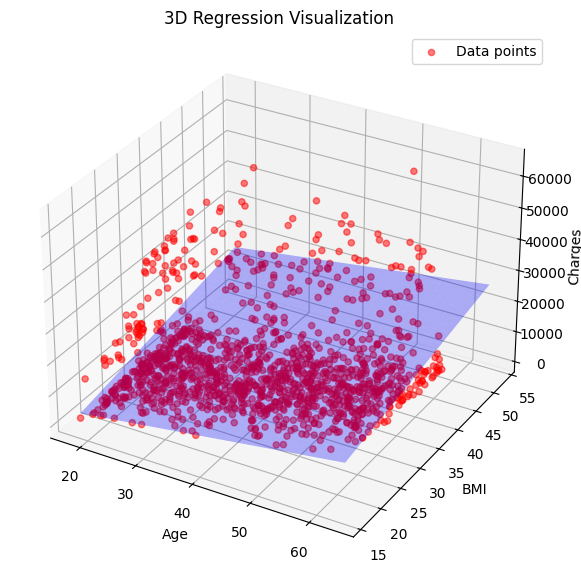

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Select features and target
X_age_bmi = df[['age', 'bmi']].to_numpy()  # 2 features
y = df['charges'].to_numpy()
#smoker_fixed = 0  # visualize for non-smokers

# Train the model with all three features
X_full = df[['age', 'bmi']].to_numpy()
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_full, y)

# Prepare a meshgrid for age and bmi
age_range = np.linspace(df['age'].min(), df['age'].max(), 30)
bmi_range = np.linspace(df['bmi'].min(), df['bmi'].max(), 30)
Age, BMI = np.meshgrid(age_range, bmi_range)

# Predict charges using the model
Charges = regressor.intercept_ + regressor.coef_[0]*Age + regressor.coef_[1]*BMI

# Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['bmi'], y, c='r', marker='o', alpha=0.5, label='Data points')
ax.plot_surface(Age, BMI, Charges, color='blue', alpha=0.3)

ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Charges')
ax.set_title('3D Regression Visualization')
plt.legend()
plt.show()


# **Evaluation**

In [ ]:
from sklearn.metrics import r2_score

y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² score:", r2)


R² score: -2.395315642580389


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


MAE: 19380.974914134134
MSE: 527118446.52478117
RMSE: 22959.060227386948


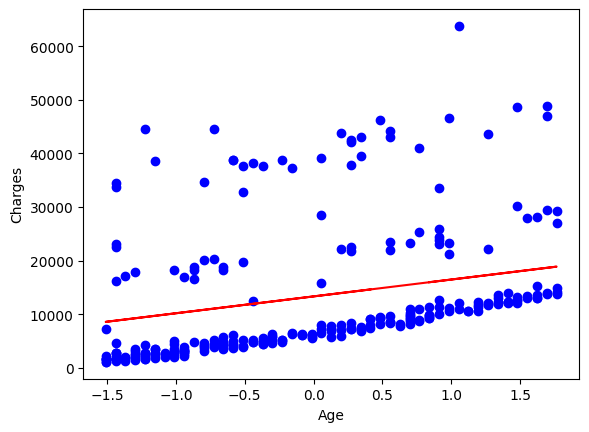

In [ ]:
# Enter your code here
X_test_1 = X_test[:,0]
plt.scatter(X_test_1, y_test,  color='blue')
plt.plot(X_test_1, coeffiecients[0] * X_test_1 + intercept, '-r')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()